<a href="https://colab.research.google.com/github/Rubi24-S/rubishabong/blob/main/dogcatclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print("TensorFlow Version:", tf.__version__)


TensorFlow Version: 2.18.0


In [ ]:
#1.mount google drive(since dataset is in drive)
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/

 ACKNOWLEDGEMENT-DHE-U2203622148753_copy.pdf
'BCA Draft SYLLABUS.pdf'
 Classroom
'Colab Notebooks'
 create_tables
 Crop_Disease_Detection_Project
 cuet
' Deep Learning Frameworks(guidelines).gdoc'
 dog_cat_classification_project
 ds
'Edureka - Internship Certificate.pdf'
 exam_datastructure
 guide.gdoc
'guides for project(machine learning).gdoc'
'guide to image classification.gdoc'
'HTML Assingments 2.gdoc'
'Image Classification.gdoc'
'Image classification steps.gdoc'
 IMG-20221212-WA0008.jpg
 index.jpeg
'java(a6).gdoc'
'java assigment.gdoc'
'java(assignment2).gdoc'
'java(assignment)serverclient.gdoc'
'java-the-complete-reference-7th-edition (1).gdoc'
 java-the-complete-reference-7th-edition.gdoc
'java threads (1).gdoc'
'java threads.gdoc'
'jdbc(2017_4) 2023_4.gdoc'
 largest.sh
 leap.sh
 linked_list
'machinelearning(imageclassification).gdoc'
'maths 2'
 maths_practical
'my program'
 mysql
 NaturalHeal.gdoc
 odd.sh
'oops php(assignment).gdoc'
 patternsA3.gdoc
 photos
 prime.sh
'Problem 

In [ ]:
import os
#2.Check if the Dataset Exists

# Define dataset directory
dataset_dir = "/content/drive/MyDrive/dog_cat_classification_project/dataset"

# Define paths for train and test folders
train_dir = os.path.join(dataset_dir, "train")
test_dir = os.path.join(dataset_dir, "test")

# Check if directories exist
print("Training directory exists:", os.path.exists(train_dir))
print("Testing directory exists:", os.path.exists(test_dir))


Training directory exists: True
Testing directory exists: True


In [ ]:
#3.Count Images in Each Folder

# Count images in each category
num_train_cats = len(os.listdir(os.path.join(train_dir, "cat")))
num_train_dogs = len(os.listdir(os.path.join(train_dir, "dog")))

num_test_images = len(os.listdir(test_dir))

print(f"Training Cats: {num_train_cats}")
print(f"Training Dogs: {num_train_dogs}")
print(f"Testing Images (Mixed): {num_test_images}")



Training Cats: 12500
Training Dogs: 12500
Testing Images (Mixed): 12500


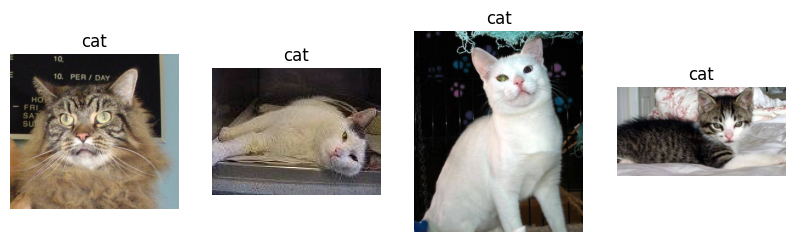

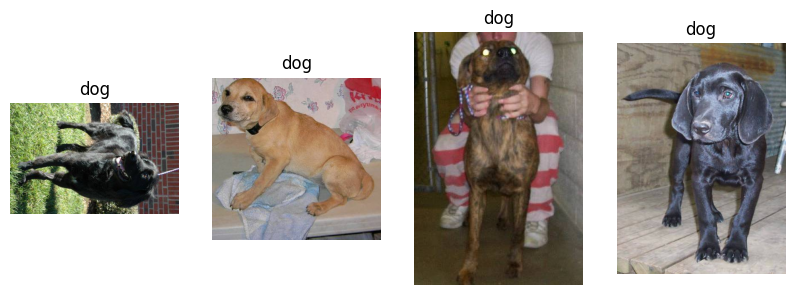

In [ ]:
#4.Display Sample Images to Verify Data

import matplotlib.pyplot as plt
import cv2
import random

# Function to display random images from a folder
def show_images(category, folder, num_images=4):
    folder_path = os.path.join(train_dir, category)
    images = random.sample(os.listdir(folder_path), num_images)

    fig, axes = plt.subplots(1, num_images, figsize=(10, 5))
    for i, img_name in enumerate(images):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axes[i].imshow(img)
        axes[i].set_title(category)
        axes[i].axis("off")
    plt.show()

# Show sample images from cat and dog folders
show_images("cat", train_dir)
show_images("dog", train_dir)



In [28]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array


# Image Preprocessing
# Create a data generator for training images
train_datagen = ImageDataGenerator(rescale=1./255)  # Normalize pixel values


# Load training images

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=32,
    class_mode='binary',  # Two classes: cat and dog
    classes=['cat', 'dog']  # Specify the class names
)

# Load test images (mixed images)

test_images = []
for filename in os.listdir(test_dir):
    img_path = os.path.join(test_dir, filename)  # Create full path
    img = load_img(img_path, target_size=(150, 150))  # Load and resize image
    img_array = img_to_array(img) / 255.0  # Convert to array and normalize
    test_images.append(img_array)  # Add to the list


# Convert the list to a NumPy array
test_data = np.array(test_images)


# Print the shape of the test data
print("Test data shape:", test_data.shape)  # Show how many images were loaded


Found 25000 images belonging to 2 classes.
Test data shape: (12500, 150, 150, 3)
